# Ví dụ về hồi quy tuyến tính

Trong bài này, chúng ta sẽ sẽ thử nghiệm việc cài đặt mô hình `hồi quy tuyến tính` thông qua ví dụ `đoán giá nhà` đã nêu trong video:
- Tạo tập hợp các cặp (diện tích nhà, giá nhà)
- Dữ liệu trên là dữ liệu đã biết, ta dùng để  huấn luyện ra mô hình hồi quy tuyến tính xấp xỉ tốt nhất với chúng
- Sử dụng mô hình để đoán được giá của một căn nhà có diện tích cho trước

### Đầu tiên ta khai báo các thư viện sẽ sử dụng

In [1]:
import matplotlib.pyplot as plt #pyplot giúp mô tả dữ liệu thông qua các biểu đồ trực quan
import numpy as np #numpy là thư viện giúp thao tác linh hoạt hơn trên dữ liệu
from sklearn import linear_model #sklearn là thư viện có sẵn các mô hình học máy thông dụng

### Tạo các cặp giá trị (diện tích nhà, giá nhà) và thể hiện lên biểu đồ

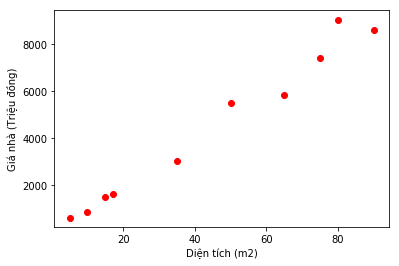

In [2]:
data=np.array([[15,1504],[17,1608],[75,7394],[10,831],[50,5507],
               [35,3011],[90,8612],[80,9036],[5,614],[65,5832]])
area=data[:,0]
price=data[:,1]
plt.xlabel("Diện tích (m2)")
plt.ylabel("Giá nhà (Triệu đồng)")
plt.scatter(area, price,  color='red')


### Tạo hàm xấp xỉ dữ liệu đã biết với phương pháp hồi quy tuyến tính

Nhìn trên biểu đồ, ta có thể hình dung ra một đường thẳng tạo nên bởi các chấm tròn. Đường thẳng xấp xỉ tốt nhất với dữ liệu đã cho chính là  đường thẳng biểu diễn bởi hàm `y=F(x)=ax+b` với `a` và `b` là các tham số có được nhờ phương pháp hồi quy tuyến tính. Thật may, với `sklearn`, chúng ta có thể làm được điều đó chỉ với một vài dòng code. 

Đầu tiên, ta khai báo một mô hình `Hồi quy tuyến tính` từ `sklearn`

In [3]:
regr = linear_model.LinearRegression() 

Tiếp theo, ta cung cấp dữ liệu đã biết để huấn luyện mô hình bằng phương thức `fit()` . Trong trường hợp này, huấn luyện mô hình bản chất là dựa vào dữ liệu để tính các tham số `a` và `b` của hàm `F(x)=ax+b`. 

Để sử dụng được phương thức `fit`, chúng ta cần biến đổi `area` thành mảng hai chiều. 2D là viết tắt của 2 dimensions (2 chiều)

In [4]:
area_2D=area[:,np.newaxis]
regr.fit(area_2D, price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Vậy là chúng ta đã có hàm tuyến tính xấp xỉ tốt nhất với dữ liệu đã cho. Giờ ta sẽ biểu diễn hàm này lên biểu đồ:

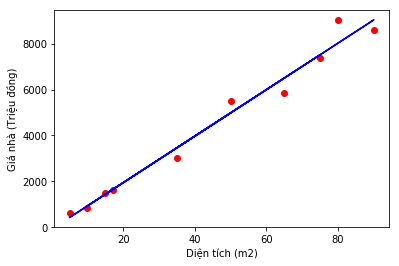

In [5]:
plt.xlabel("Diện tích (m2)")
plt.ylabel("Giá nhà (Triệu đồng)")
plt.scatter(area, price,  color='red')

plt.plot(area, regr.predict(area_2D),  color='blue')

### Sử dụng mô hình để đoán được giá của một căn nhà có diện tích cho trước

Tiếp theo, với hàm tuyến tính đã có, ta sẽ tiến hành dự đoán giá nhà của 3 căn nhà có diện tích:
- 19.2 mét vuông
- 102.5 mét vuông
- 56.9 mét vuông

In [6]:
need_prediction=[19.2,102.5,56.9]
for element in need_prediction:
    print(f"Căn nhà có diện tích {element:.1f} có giá khoảng {regr.predict([[element]])[0]:.2f} triệu đồng")

Căn nhà có diện tích 19.2 có giá khoảng 1858.68 triệu đồng
Căn nhà có diện tích 102.5 có giá khoảng 10309.36 triệu đồng
Căn nhà có diện tích 56.9 có giá khoảng 5683.30 triệu đồng
